In [228]:
f = open('data.json')

In [229]:
import json
import pandas as pd

In [230]:
data=json.load(f)

In [231]:
df=pd.DataFrame(data)

In [232]:
df

,took,timed_out,_shards,hits,aggregations
total,198,False,12.0,"{'value': 80, 'relation': 'eq'}",NaN
successful,198,False,12.0,NaN,NaN
skipped,198,False,9.0,NaN,NaN
failed,198,False,0.0,NaN,NaN
max_score,198,False,NaN,None,NaN
hits,198,False,NaN,"[{'_index': '.ds-processstream-000005', '_type...",NaN
2,198,False,NaN,NaN,{'buckets': [{'key_as_string': '2023-10-22T02:...


In [233]:
d = data['hits']['hits']
d

[{'_index': '.ds-processstream-000005',
  '_type': '_doc',
  '_id': 'Lz4dVYsB2mxSHAcnIofX',
  '_version': 1,
  '_score': None,
  '_source': {'lastPolledAt': '2023-10-22T02:00:51Z',
   'cpuUtilization(%)': 0.01,
   'runByUser': None,
   'processName': 'csrss',
   'processID': 608,
   'processStartTime': '2023-10-22T01:02:18Z',
   'virtualMemorySize(in MB)': 667.66015625,
   'memoryUtilization(%)': 0,
   'ciName': 'AWNCK006',
   'toolOrgId': '2001',
   'organizationId': '1408158',
   'source': 'Solarwinds'},
  'fields': {'processStartTime': ['2023-10-22T01:02:18.000Z'],
   'lastPolledAt': ['2023-10-22T02:00:51.000Z']},
  'highlight': {'ciName': ['@opensearch-dashboards-highlighted-field@AWNCK006@/opensearch-dashboards-highlighted-field@']},
  'sort': [1697940051000]},
 {'_index': '.ds-processstream-000005',
  '_type': '_doc',
  '_id': 'MT4dVYsB2mxSHAcnIofX',
  '_version': 1,
  '_score': None,
  '_source': {'lastPolledAt': '2023-10-22T02:00:51Z',
   'cpuUtilization(%)': 0.01,
   'runByUse

In [234]:
new_data=[]
for i in d:
    i=i['_source']
    new_data.append({'cpuUtil':i['cpuUtilization(%)'],
                 'Time':i['processStartTime']
                   })

In [235]:
df=pd.DataFrame(new_data)

In [236]:
df['Time'] = df['Time'].replace('T',' ',regex=True)
df['Time'] = df['Time'].replace('Z','',regex=True)
df

,cpuUtil,Time
0,0.01,2023-10-22 01:02:18
1,0.01,2023-10-22 01:02:52
2,0.00,2023-10-22 01:02:20
3,0.02,2023-10-22 01:02:59
4,0.10,2023-10-22 01:02:21
5,0.14,2023-10-22 01:02:49
6,0.01,2023-10-22 01:02:52
7,0.02,2023-10-22 01:03:07
8,0.66,2023-10-22 01:02:55
9,0.34,2023-10-22 01:02:44


In [237]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S')


In [238]:
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import joblib 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
from sklearn.metrics import accuracy_score,classification_report,r2_score


In [239]:
# for i in range(len(df['Time'])):
#     df['Time'][i]=df['Time'][i].timestamp()

In [248]:
# df['Time'] = np.array(df['Time'], dtype=float)
df['Time'] = df['Time'].values.astype(float)
df.dtypes

cpuUtil    float64
Time       float64
dtype: object

In [241]:
from datetime import datetime


X=df[['Time']]
# df['Time'] = label_encoder.fit_transform(df['Time'])
Y =df['cpuUtil']


In [242]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4,random_state=2,shuffle=True)
X_train

,Time
7,1.697937e+18
2,1.697937e+18
3,1.697937e+18
6,1.697937e+18
9,1.697937e+18
8,1.697937e+18


In [243]:
reg=LinearRegression()
reg.fit(X_train,Y_train)


LinearRegression()

In [244]:
y_pred=reg.predict(X_test)

In [245]:
print(y_pred)

[0.12530934 0.17935883 0.17412823 0.12007874]


In [246]:

accuracy=r2_score(Y_test,y_pred)
# report=classification_report(Y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
# print(report)

Accuracy: -230.27%


C:\Users\10726055\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


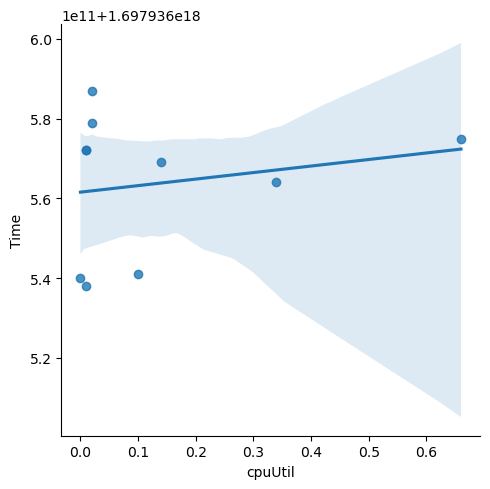

In [247]:
sns.lmplot(x='cpuUtil',y='Time',data=df)